In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fn="../prices.txt"
df=pd.read_csv(fn, sep='\s+', header=None, index_col=None)
prices = (df.values).T

nInst ,T = 50,750

## Time series differncing 

C:\Users\heroi\AppData\Local\Temp\ipykernel_54812\1216694549.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


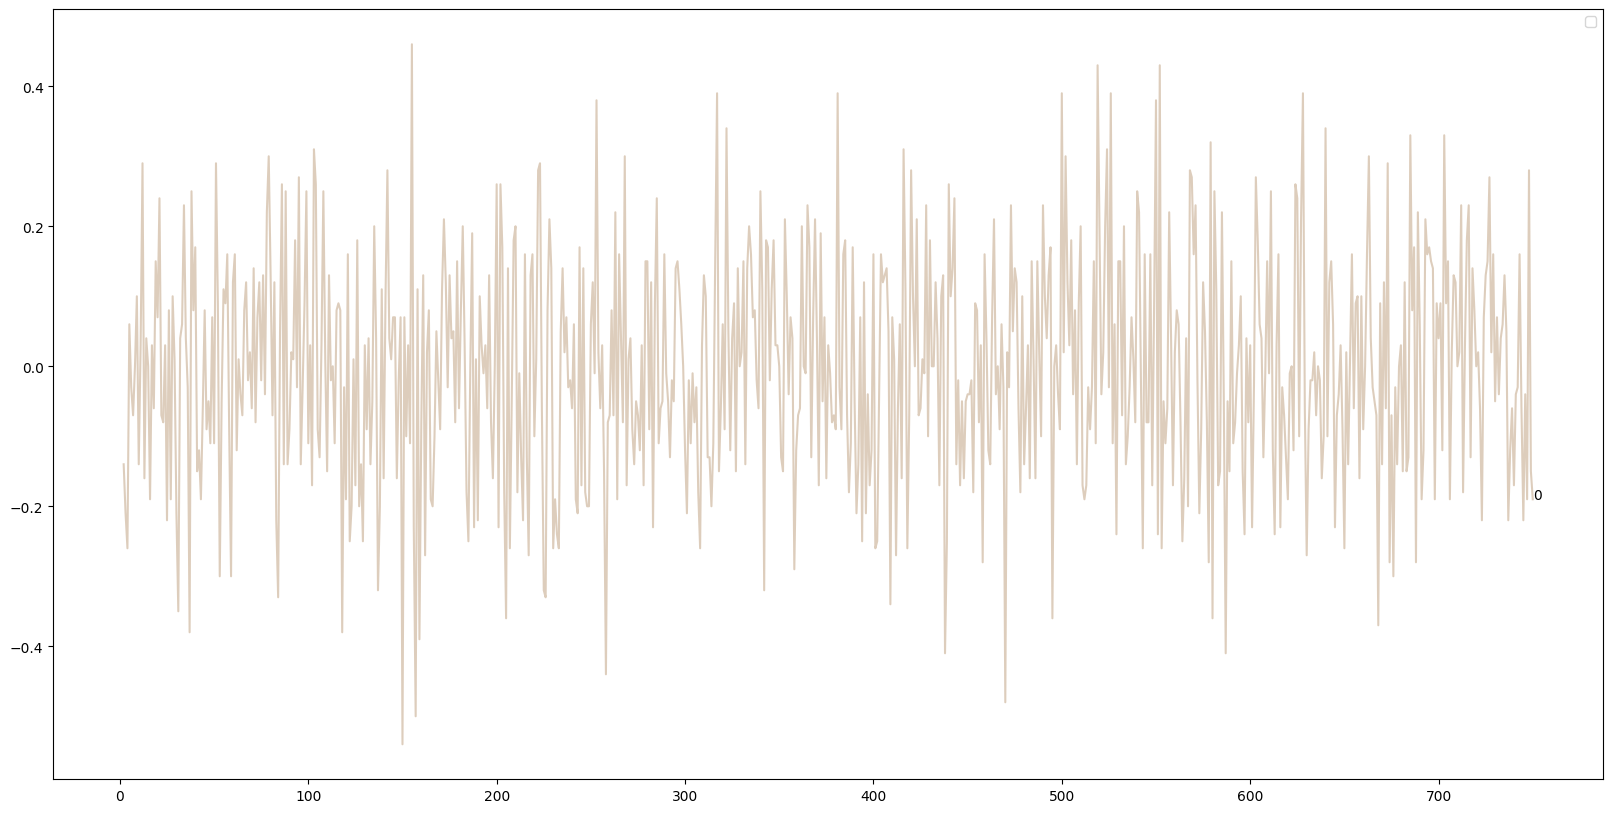

In [18]:
t = 750
tx = np.linspace(1,t,t)
pdiff = np.zeros((nInst,t))
for i in range(nInst):
    current = prices[i,:t]
    previous = np.zeros((t,))
    previous[0] = 1e-8
    previous[1:] = current[:-1]
    delta = current-previous
    pdiff[i,:] = delta
posDelta = np.where(pdiff > 0,pdiff,0)
negDelta = np.where(pdiff < 0,-pdiff,0)

colors = np.random.rand(nInst, 3)
def plotSplit():
    f,ax = plt.subplots(figsize=(20,10))
    for i in [0]:
        ax.plot(tx[1:], pdiff[i][1:],alpha=0.3,color=colors[i])
        lastDiff = pdiff[i][-1]
        lastT = tx[-1]
        ax.text(lastT,lastDiff,str(i))
    plt.legend()
    plt.show()
plotSplit()